In [ ]:
!wget https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!./Miniconda3-latest-Linux-x86_64.sh -bfp /usr/local

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
!conda init bash

no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.10/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
modified      /root/.bashrc

==> For changes to take effect, close and re-open your current shell. <==



In [ ]:
!conda create --name env_9989 --yes

In [ ]:
!conda activate env_9989


no change     /usr/local/condabin/conda
no change     /usr/local/bin/conda
no change     /usr/local/bin/conda-env
no change     /usr/local/bin/activate
no change     /usr/local/bin/deactivate
no change     /usr/local/etc/profile.d/conda.sh
no change     /usr/local/etc/fish/conf.d/conda.fish
no change     /usr/local/shell/condabin/Conda.psm1
no change     /usr/local/shell/condabin/conda-hook.ps1
no change     /usr/local/lib/python3.10/site-packages/xontrib/conda.xsh
no change     /usr/local/etc/profile.d/conda.csh
No action taken.


In [ ]:
!conda install --name env_9989 pandas --yes
!conda install --name env_9989 matpolotlib --yes
!conda install --name env_9989 cv2 --yes
!conda install --name env_9989 numpy --yes

In [ ]:
!conda install --name env_9989 pyplot --yes

In [ ]:
!conda install --name env_9989 google.colab.patches --yes

In [ ]:
!conda install --name env_9989 cv2_imshow --yes
!conda install --name env_9989 sklearn.metrics --yes
!conda install --name env_9989 sklearn.model_selection.train_test_split.KNeighborsClassifier --yes
!conda install --name env_9989 sklearn.neighbors --yes
!conda install --name env_9989 confusion_matrix --yes


In [199]:
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import cv2
import numpy as np
from sklearn import metrics
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
def findRotationAngle(x):
    # Θόλωση της εικόνας
    blurred = cv2.GaussianBlur(x, (9, 9), cv2.BORDER_DEFAULT)
    #cv2_imshow(np.hstack((x, blurred)))

    # Διακριτός μετασχηματισμός Fourier
    dft = cv2.dft(np.float32(blurred), flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    # Υπολογίζουμε το μέτρο του DFT και τον λογάριθμο του
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
    #plt.subplot(121),plt.imshow(img, cmap = 'gray')
    #plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    #plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
    #plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    #plt.show()

  
    
    # Εντοπίζουμε την μέγιστη συχνότητα μεταβολής
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(magnitude_spectrum)

    # Εκτιμούμε τη γωνία περιστροφής
    angle_estimate = np.degrees(np.arctan2(max_loc[1] - magnitude_spectrum.shape[0]//2, 
                                       max_loc[0] - magnitude_spectrum.shape[1]//2))

    
    # Αναζητούμε την ακριβή γωνία
    max_var = np.var(cv2.reduce(blurred, 1, cv2.REDUCE_AVG).reshape(-1))
    best_angle = angle_estimate

    # Δοκιμάζουμε γωνίες γύρω από την εκτιμώμενη γωνία
    for angle in np.arange(angle_estimate - 10, angle_estimate + 10, 0.1):
        rotated = rotateImage(blurred, angle)
        rotated_var = np.var(cv2.reduce(rotated, 1, cv2.REDUCE_AVG).reshape(-1))
    
        # Αν η διακύμανση της προβολής φωτεινότητας είναι μεγαλύτερη, αυτή είναι η καλύτερη γωνία μέχρι στιγμής
        if rotated_var >= max_var:
            max_var = rotated_var
            best_angle = angle


    return best_angle


In [ ]:
def rotateImage(image, angle):
     # Κέντρο περιστροφής: κέντρο της εικόνας
    image_center = tuple(np.array(image.shape[1::-1]) / 2)# image_center = (x.shape[1] / 2, x.shape[0] / 2)
    # Μετασχηματισμός περιστροφής
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    # Εφαρμογή του μετασχηματισμού περιστροφής
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderMode=cv2.BORDER_CONSTANT, borderValue=255)
    return result






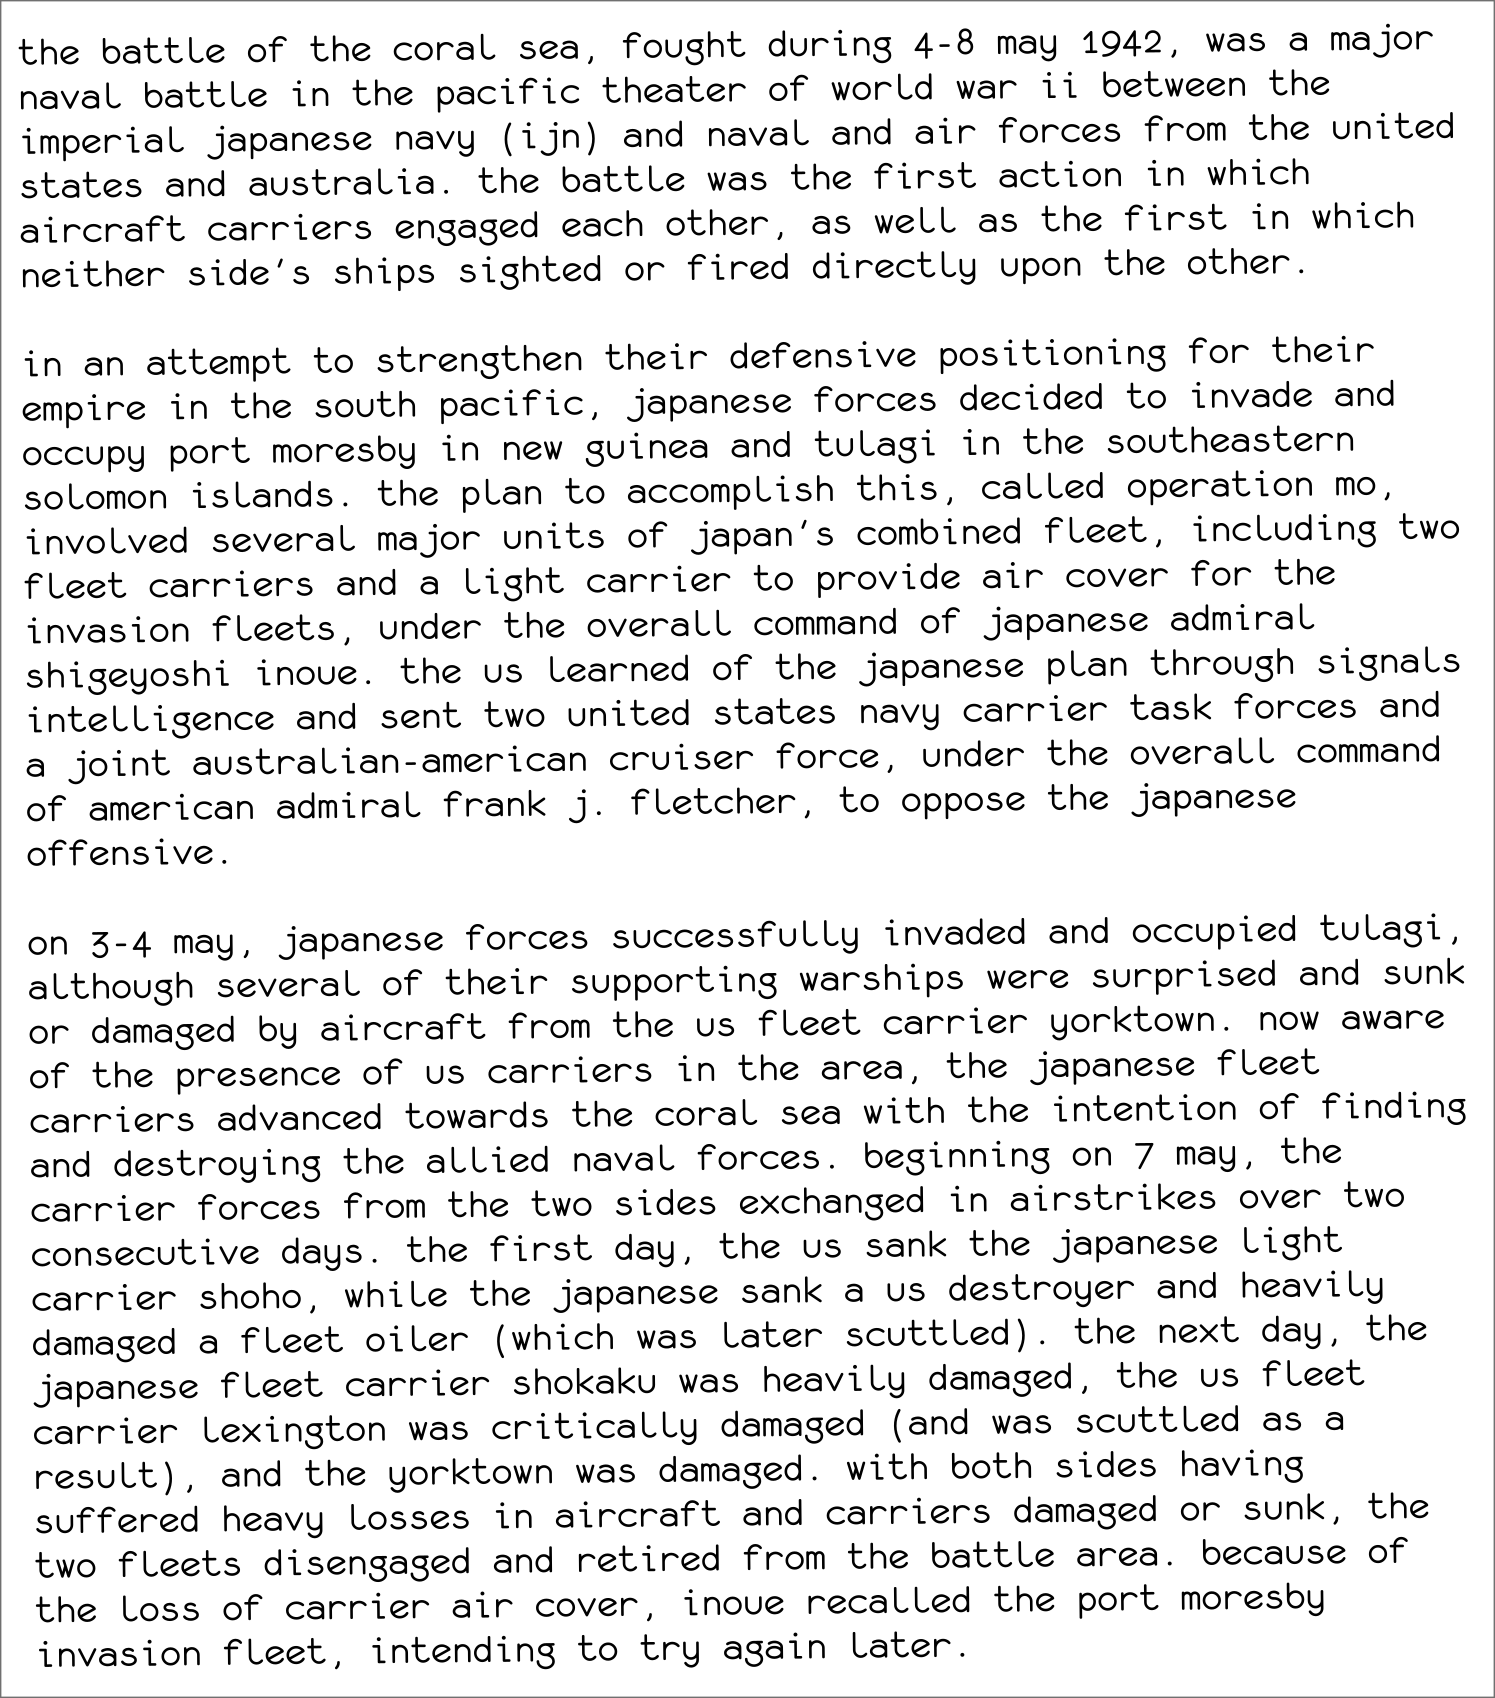

The best angle is:  -0.6000000000000334


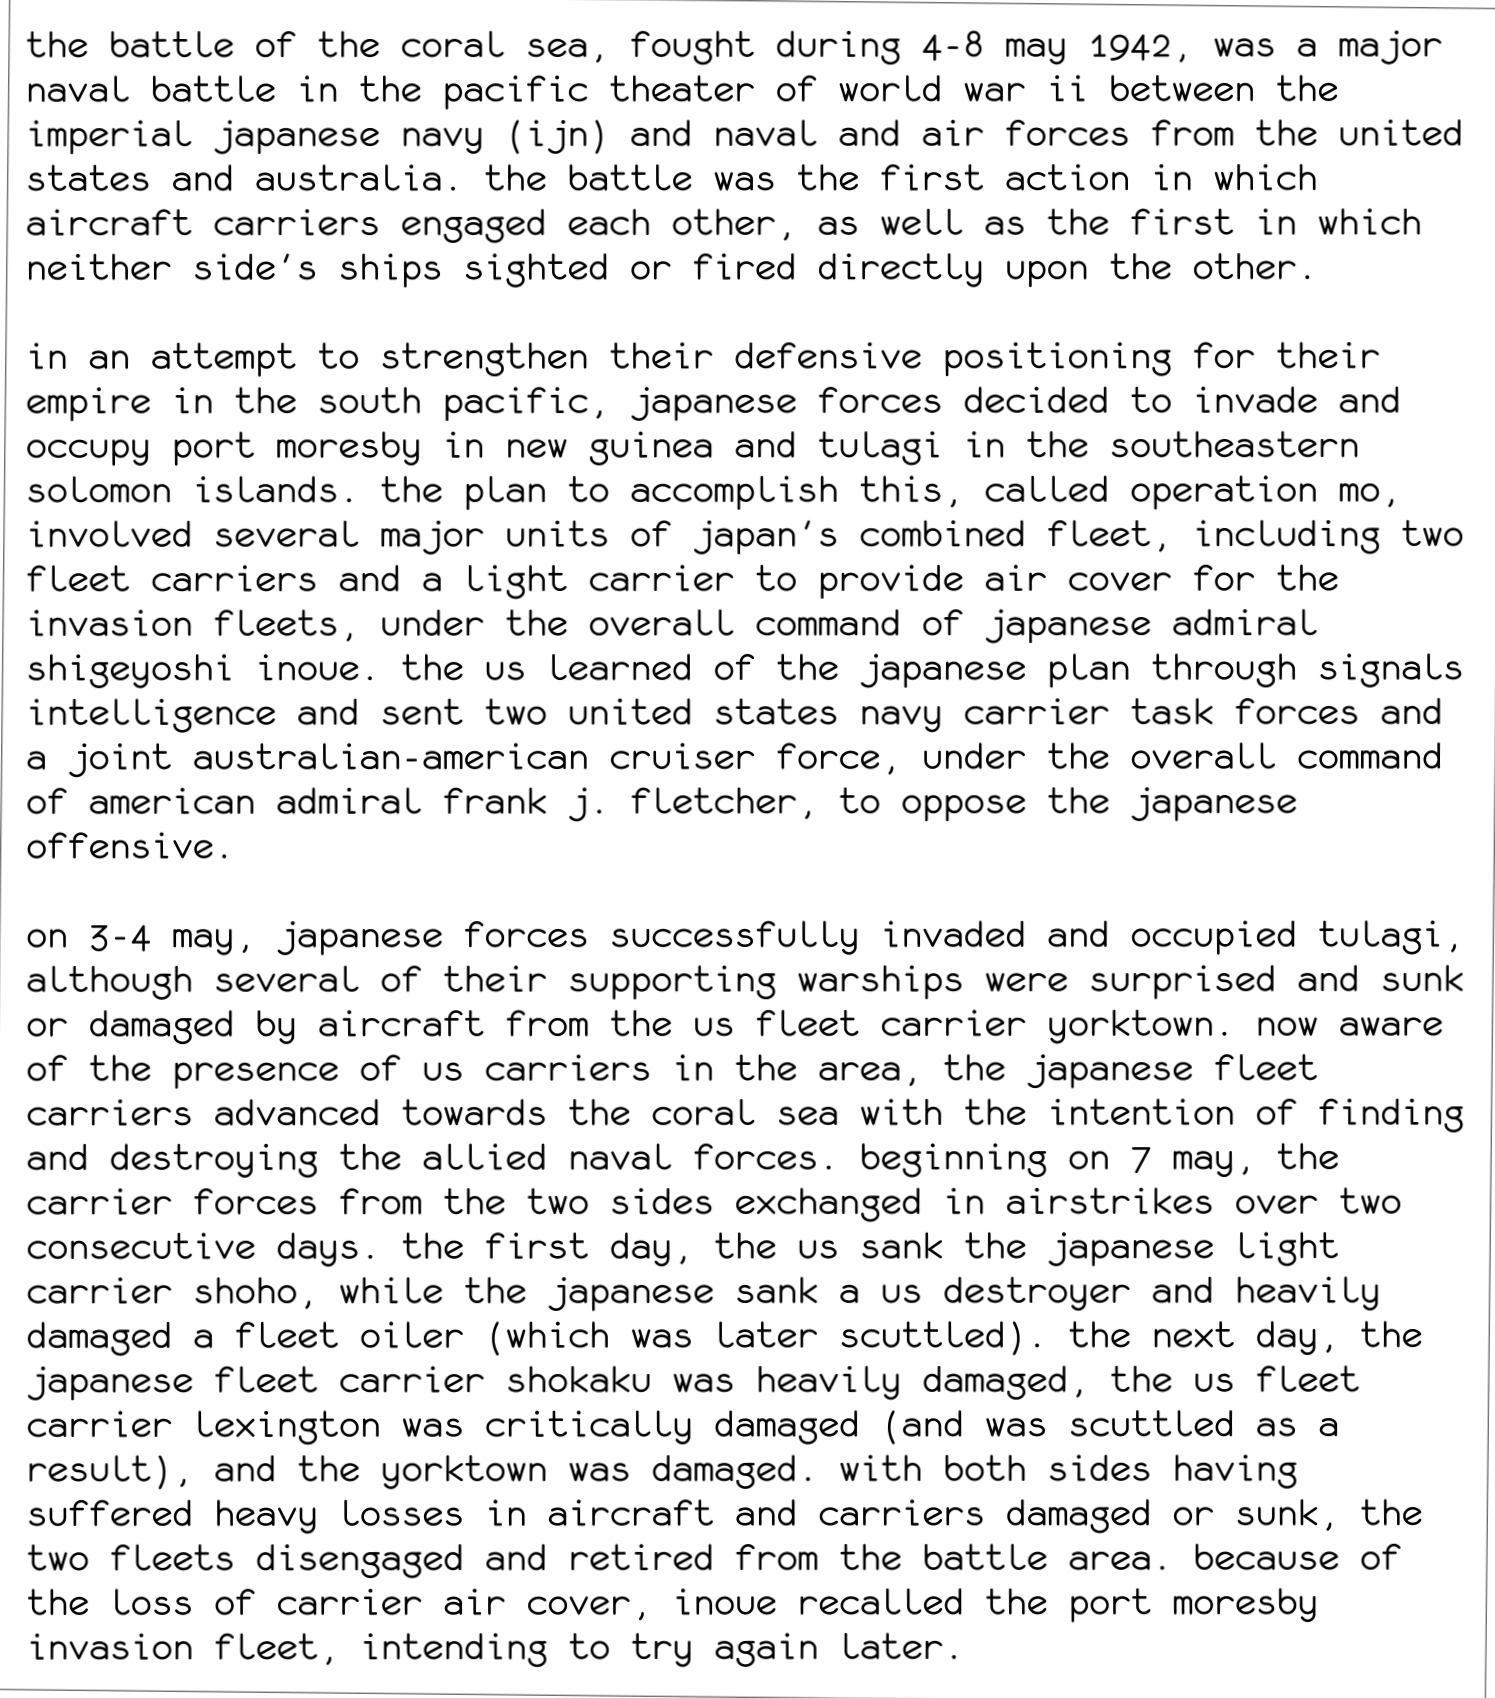

In [ ]:
img = cv2.imread('text2_150dpi_rot.png',0)
cv2_imshow(img)
angle=findRotationAngle(img)
print("The best angle is: ",angle)
cor=rotateImage(img, angle)
cv2_imshow(cor)



In [ ]:
def getcontour(img):

    #Preprocess the image: To enhance the contours, you may need to apply certain preprocessing steps. 
    #Common techniques include converting the image to grayscale, thresholding, blurring, or applying morphological operations. 
    #The specific preprocessing steps depend on the nature of your image.
    kernel = np.ones((1,1),np.uint8)



    # Εφαρμόζουμε thresholding για να πάρουμε μια binary image
    _, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
    #is instead of doing the following but with better result because it had double contour like this
    #dilation = cv2.dilate(img,kernel,iterations = 1)
    #kap=dilation-img

    # Opening on  image
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

    thinned = cv2.ximgproc.thinning(opening)


    # Εντοπίζουμε τα περιγράμματα
    #Find contours: Find the contours in the image using the findContours function provided by OpenCV. 
    #This function returns a list of contours detected in the image.
    contours,hierarchy = cv2.findContours(thinned, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    #cv2_imshow(thinned)
    # Δημιουργούμε ένα cell array για να αποθηκεύσουμε τα περιγράμματα
    c = []
    for contour in contours:
        c.append(contour.reshape(-1, 2))
    return c,hierarchy

def contour_descriptor(c,N):
    # Υπολογίζουμε τον DFT του περιγράμματος
    r = [complex(pt[0], pt[1]) for pt in c]

    # Δημιουργούμε νέες ακολουθίες με το ίδιο μήκος
    x_new = np.linspace(0, len(r), N, endpoint=False)


    # Δημιουργούμε την νέα μιγαδική ακολουθία
    r_new = np.interp(x_new, np.arange(len(r)), r)
    #f = interp1d(np.arange(len(r)), r, kind='linear')(x_new)
    
    R = np.fft.fft(r_new)

    # Υπολογίζουμε το μέτρο της R, εξαιρώντας τον πρώτο όρο
    descriptor = np.abs(R[1:])

    return descriptor
def findDescriptors(contours,hierarchy,N,multiplier):
  letters = 1
  if len(contours)>1:
    for contour in hierarchy[0]:
      if contour[0]>0 and contour[3]<0:
        letters+=1
  letters_contours=[]
  letter_index=0
  for i in range(letters):
    level=0
    #it skips them when they are small consecutive,it doesnt skip dots,commas because they are recognised as solo chars and they will not have and next contour
    #the problem is to have them together if not to be one letter,is is for the wave line under some text
    #if letters>1 is to ensure dots and commas are not skipped
    if letters>1 and len(contours[letter_index])<8.5 *multiplier:#N[2]/3
      if hierarchy[0][letter_index][0]>0:
        letter_index=hierarchy[0][letter_index][0]
      continue
    letter_descs=[]
    letter_descs.append(contour_descriptor(contours[letter_index],N[level]))
    if hierarchy[0][letter_index][2]>0:#if it has child
      child_index=letter_index
      while hierarchy[0][child_index][2]>0:
        if level<2:
          level+=1
        child_index=hierarchy[0][child_index][2]
        letter_descs.append(contour_descriptor(contours[child_index],N[level]))
        #if the child has a next contour/case for up and down children of a letter like "g"
        #I can continue more for example if the next_child has a child but we will not see that complex in letters
        if hierarchy[0][child_index][0]>0:
          next_child_index=child_index
          while hierarchy[0][next_child_index][0]>0:
            if level<2:
              level+=1
            next_child_index=hierarchy[0][child_index][0]
            letter_descs.append(contour_descriptor(contours[next_child_index],N[level]))

      
    #if the contour doesnt have any child and its next one is small enought to be the dot in i or j 
    #if we have more than one letters and its not the last one and is next contour is small then is the case of i j
    if letters>1 and i<letters-1 and len(contours[hierarchy[0][letter_index][0]])<8.5 *multiplier and hierarchy[0][letter_index][2]<0:
      letter_descs.append(contour_descriptor(contours[hierarchy[0][letter_index][0]],N[level+1]))
    letters_contours.append(letter_descs)
    if hierarchy[0][letter_index][0]>0:
      letter_index=hierarchy[0][letter_index][0]#the next index in the hierarchy for the letter
  letters_contours.reverse()
  return letters_contours

def distance(desc1, desc2):
    return np.sum((desc1 - desc2) ** 2)

In [ ]:
def read_text_file(filename):
  lines = []
  #convert text to a list of lines texts
  with open(filename, 'r',encoding='utf-16') as file:
      for line in file:
          line = line.strip()
          if line:
              lines.append(line)

  # Split each line into words arrays
  words = [line.split() for line in lines]

  # Convert to NumPy array
  array = np.array(words)
  #close the file
  file.close()

  return array


In [ ]:
def preprocess_image(image):
    # Προεπεξεργασία εικόνας - αναίρεση περιστροφής και κατακόρυφη προβολή φωτεινότητας
    angle=findRotationAngle(image)
    cor=rotateImage(image, angle)
    blurred = cv2.GaussianBlur(cor, (9, 9), cv2.BORDER_DEFAULT)
    vertical_projection = cv2.reduce(blurred, 1, cv2.REDUCE_AVG)
    return cor,vertical_projection

def segment_lines(vertical_projection):
    # Εντοπισμός και διαχωρισμός γραμμών κειμένου
    lines = []
    threshold = np.mean(vertical_projection)  # Κατώφλι για εντοπισμό γραμμών,it didnt work that well better to check if it is white or really close
    line_start = None
    for i, projection in enumerate(vertical_projection):
        if line_start is None and projection < 255:
            line_start = i
        elif line_start is not None and projection >= 255:
            line_end = i
            lines.append((line_start, line_end))
            line_start = None
    if line_start is not None:
        line_end = len(vertical_projection)
        lines.append((line_start, line_end))
    #I do this to remove the black lines in the top and bottom of the image 
    meanLineLength=np.mean([(line[1]-line[0]) for line in lines])
    for i,line in enumerate(lines):
      if (line[1]-line[0])< (0.5*meanLineLength):#or could be like this(img.shape[0] *0.01)
        del lines[i]
    return lines


def segment_words(line,multiplier):
    # Διαχωρισμός λέξεων σε μια γραμμή κειμένου
    words = []
    start = None
    end = None
    threshold =245  # 0 Κατώφλι για εντοπισμό λέξεων maybe different for rotated 
    for i, projection in enumerate(line):
        if start is None and projection < threshold:
            start = i
        elif start is not None and projection >= threshold:
            end = i
            words.append((start, end))
            start = None
            end = None
    if start is not None:
        end = len(line)
        words.append((start, end))
    #remove random character that are not words or letters,only needed in the rotated one
    for i,word in enumerate(words):
      if word[1]-word[0]<np.ceil(2*(multiplier/2+0.05)):#4 for 1496x1698 ,2 for 959x720 
        del words[i]

    #connect the letters that should belong in the same word  based on a minimum distance of 3 pixels
    lastword=words[len(words)-1]
    for i in range(len(words)-1):
      stop=False
      while stop==False and words[i+1][0]-words[i][1]<4*np.ceil(multiplier):#16 for 1496x1698 ,4 for 959x720, 3 for rotated text1 
        words[i]=(words[i][0],words[i+1][1])
        if words[i+1]== lastword:
          stop=True
        del words[i+1]
      if stop==True or words[i+1]== lastword:
        break
    return words

def segment_characters(word):
    # Διαχωρισμός χαρακτήρων σε μια λέξη
    characters = []
    start = None
    end = None
    threshold =245  # 0 Κατώφλι για εντοπισμό 
    for i, projection in enumerate(word):
        if start is None and projection < threshold:
            start = i
        elif start is not None and projection >= threshold:
            end = i
            characters.append((start, end))
            start = None
            end = None
    if start is not None:
        end = len(word)
        characters.append((start, end))
    for i,char in enumerate(characters):
      if char[1]-char[0]<2:
        del characters[i]
    return characters


def create_datasets(image,text_file,N):
  text=read_text_file(text_file)
  dataset1 = []
  dataset2 = []
  dataset3 = []
  #Δημιουργία συντελεστή για το όριο της απόστασης των πιξελ μεταξύ λέξεων στην segment_words και μεγέθος γραμμάτων στηνr findDescriptors με βάση το μέγεθος της εικόνας

  base=690480 #959x720 
  image_pixels=image.shape[0]*image.shape[1]
  multiplier=image_pixels/base
  cor,vertical_projection = preprocess_image(image)
  lines = segment_lines(vertical_projection)
  for line_index,line in enumerate(lines):
    horizontal_projection=cv2.reduce(cor[line[0]:line[1],:], 0, cv2.REDUCE_AVG).flatten()
    words=segment_words(horizontal_projection,multiplier)
    for word_index,word in enumerate(words):
      word_text=text[line_index][word_index]
      chars=0
      characters=segment_characters(horizontal_projection[word[0]:word[1]])
      for char_start, char_end in characters:
        #cv2_imshow(cor[line[0]:line[1],word[0]+char_start:word[0]+char_end])
        _,thresh=cv2.threshold(cor[line[0]:line[1],word[0]+char_start:word[0]+char_end], 127, 255, cv2.THRESH_BINARY)#maybe without it too
        contours,hierarchy=getcontour(thresh)
        letters_contours=findDescriptors(contours,hierarchy,N,multiplier)
        #print(word_text[chars])
        for letter in letters_contours:
          if len(letter)==1:
            dataset1.append((letter,word_text[chars]))
          elif len(letter)==2:
            dataset2.append((letter,word_text[chars]))
          else:
            dataset3.append((letter,word_text[chars]))
          chars+=1
  return {1:dataset1,2:dataset2,3:dataset3} 

def predict_text(image,classifier1,classifier2,classifier3,N):

  #Δημιουργία ενός συντελεστή του ορίου για την απόσταση σε pixel των γραμμάτων στις λέξεις στην segment_words και findDescriptors
  #που βασιζεται στο μεγεθος της εικονας finddescriptors

  base=690480 #959x720 
  image_pixels=image.shape[0]*image.shape[1]
  multiplier=image_pixels/base
  cor,vertical_projection = preprocess_image(image)
  lines = segment_lines(vertical_projection)
  detected_text = []
  for line_index,line in enumerate(lines):
    line_text=[]
    horizontal_projection=cv2.reduce(cor[line[0]:line[1],:], 0, cv2.REDUCE_AVG).flatten()
    words=segment_words(horizontal_projection,multiplier)
    for word_index,word in enumerate(words):
      word_text=""
      chars=0
      characters=segment_characters(horizontal_projection[word[0]:word[1]])
      for char_start, char_end in characters:
        #cv2_imshow(cor[line[0]:line[1],word[0]+char_start:word[0]+char_end])
        _,thresh=cv2.threshold(cor[line[0]:line[1],word[0]+char_start:word[0]+char_end], 127, 255, cv2.THRESH_BINARY)#maybe without it too
        contours,hierarchy=getcontour(thresh)
        letters_contours=findDescriptors(contours,hierarchy,N,multiplier)
        #print(word_text[chars])
        for letter in letters_contours:
          if len(letter)==1:
            #prepei na ta kano kai float..
            char=classifier1.predict(letter)
            word_text+=char[0]
          elif len(letter)==2:
            flat=flattenTestSet(letter)
            char=classifier2.predict(flat)
            word_text+=char[0]
          
          else:
            flat= flattenTestSet(letter)
            char=classifier3.predict(flat)
            word_text+=char[0]
      line_text.append(word_text)
    detected_text.append(line_text)
  return np.array(detected_text)           

def extract_features(dataset):
    X = []
    y = []
    for item in dataset:
        X.append(item[0])
        y.append(item[1])
    return np.array(X), np.array(y)

def flattenTrainSet(X_mult):
  extra_size=0
  if X_mult.shape[1]==2:
    extra_size=X_mult[0][1].shape[0]
  elif X_mult.shape[1]==3:
    extra_size=X_mult[0][1].shape[0]+X_mult[0][2].shape[0]

  X_2dim=np.ones((X_mult.shape[0],X_mult[0][0].shape[0]+extra_size))
  for index,X in enumerate(X_mult):
    values=[]
    for i in range(X.shape[0]):
      for n in X[i]:
        values.append(n)
    values=np.array(values)
    for j,value in enumerate(values):
      X_2dim[index,j]=value#np.array([X[i] for i in range(X.shape[0])]).flatten()
  return X_2dim

def flattenTestSet(X_mult):
  X_2dim=[]
  values=[]
  for i in range(len(X_mult)):#(X_mult.shape[0]):
    for n in X_mult[i]:
      values.append(n)
  values=np.array(values)
  X_2dim.append(values)
  return np.array(X_2dim)  

def train_classifier(X_train, y_train):
    classifier = KNeighborsClassifier(n_neighbors=3)
    classifier.fit(X_train, y_train)
    return classifier

def evaluate_classifier(classifier,X_test,y_test):
  y_pred = classifier.predict(X_test)
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  #Classification report
  print("Classification Report:")
  cr = metrics.classification_report(y_test, y_pred)
  print(cr)
  return metrics.accuracy_score(y_test, y_pred),cr
def readtext(image):

    N=[50,25,25]
    N=[80,40,40]
    # Εκπαίδευση του συστήματος και αναγνώριση κειμένου
    train_text_file = "text1.txt"
    train_image = cv2.imread("text1.png", 0)
    dataset = create_datasets(train_image,train_text_file,N)
    X1, y1 = extract_features(dataset[1])
    X2, y2 = extract_features(dataset[2])
    X3, y3 = extract_features(dataset[3])
    X1=flattenTrainSet(X1)
    X2=flattenTrainSet(X2)
    X3=flattenTrainSet(X3)
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
    X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)
    classifier1 = train_classifier(X1_train, y1_train)
    classifier2 = train_classifier(X2_train, y2_train)
    classifier3 = train_classifier(X3_train, y3_train)
    print("RESULT FOR TEST SET OF TRAIN IMAGE text1.png:")
    confusion_matrix1, weighted_accuracy1 = evaluate_classifier(classifier1, X1_test, y1_test)
    confusion_matrix2, weighted_accuracy2 = evaluate_classifier(classifier2, X2_test, y2_test)
    confusion_matrix3, weighted_accuracy3 = evaluate_classifier(classifier3, X3_test, y3_test)

    test_text_file = "text2.txt"
    image = cv2.imread("text2_150dpi_rot.png", 0)
    predicted_text=predict_text(image,classifier1,classifier2,classifier3,N)
    dataset = create_datasets(image,test_text_file,N)
    X1, y1 = extract_features(dataset[1])
    X2, y2 = extract_features(dataset[2])
    X3, y3 = extract_features(dataset[3])
    X1=flattenTrainSet(X1)
    X2=flattenTrainSet(X2)
    X3=flattenTrainSet(X3)
    confusion_matrix1, weighted_accuracy1 = evaluate_classifier(classifier1, X1, y1)
    confusion_matrix2, weighted_accuracy2 = evaluate_classifier(classifier2, X2, y2)
    confusion_matrix3, weighted_accuracy3 = evaluate_classifier(classifier3, X3, y3)

    return predicted_text

# Παράδειγμα χρήσης
image = cv2.imread("text2_150dpi_rot.png", 0)  # Φορτώνουμε την εικόνα
detected_text = readtext(image)  # Αναγνώριση του κειμένου
#for line_text in detected_text:
 #   print(line_text)


<ipython-input-194-190144b4eedf>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.array(words)
<ipython-input-195-fc9b6fd3bbaa>:181: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(X), np.array(y)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python

RESULT FOR TEST SET OF TRAIN IMAGE text1.png:
Accuracy: 0.9612403100775194
Classification Report:
              precision    recall  f1-score   support

           (       0.00      0.00      0.00         0
           )       0.00      0.00      0.00         1
           ,       1.00      1.00      1.00         9
           -       1.00      1.00      1.00         1
           .       1.00      1.00      1.00         4
           2       0.00      0.00      0.00         1
           C       0.00      0.00      0.00         2
           F       0.00      0.00      0.00         1
           L       0.00      0.00      0.00         1
           M       1.00      1.00      1.00         2
           S       0.90      1.00      0.95         9
           T       0.92      1.00      0.96        11
           W       1.00      1.00      1.00         1
           X       0.00      0.00      0.00         1
           c       0.91      1.00      0.95        10
           f       0.90      1.00    

<ipython-input-195-fc9b6fd3bbaa>:173: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(detected_text)
<ipython-input-194-190144b4eedf>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.array(words)
<ipython-input-195-fc9b6fd3bbaa>:181: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(X), np.array

Accuracy: 0.09905660377358491
Classification Report:
              precision    recall  f1-score   support

           '       0.00      0.00      0.00         2
           (       0.02      1.00      0.03         3
           )       0.00      0.00      0.00         3
           ,       0.94      0.77      0.85        22
           -       0.00      0.00      0.00         3
           .       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           E       0.00      0.00      0.00         0
           G       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.00      0.00      0.00         0
           T       0.00      0.00      0.00         0
           c       0.00      0.00      0.00        67
           f       0.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Accuracy: 0.2
Classification Report:
              precision    recall  f1-score   support

           8       1.00      1.00      1.00         1
           a       0.00      0.00      0.00         4
           g       0.00      0.00      0.00         0

    accuracy                           0.20         5
   macro avg       0.33      0.33      0.33         5
weighted avg       0.20      0.20      0.20         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
!conda env export --name env_9989 --file environment.yml


In [ ]:
from google.colab import files

files.download('environment.yml')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>